In [1]:
#load libraries
import scanpy as sc
import sctoolbox.utilities as utils
import sctoolbox.tools as tools
import sctoolbox.plotting as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Unable to determine R home: [Errno 2] No such file or directory: 'R'


In [2]:
#load adata
adata = utils.load_h5ad("../../downloads/all-snRNA.h5ad")

[INFO] The adata object was loaded from: ../../downloads/all-snRNA.h5ad


In [3]:
adata.obs

,sample,n_counts,n_genes,percent_mito,doublet_score,dissociation_score,cell_type_original,patient_region_id,donor_id,patient_group,...,tissue_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
AAACCCACAAAGGAGA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,2598.0,1678,0.115473,0.000324,0.137064,Fibroblast,control_P1,P1,myogenic,...,tissue,fibroblast of cardiac tissue,10x 3' v3,normal,Homo sapiens,male,heart left ventricle,European,44-year-old human stage,ncLQ^>4V~0
AAACCCACAGAGATGC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,13003.0,4187,0.053834,0.003417,-0.006482,Cardiomyocyte,control_P1,P1,myogenic,...,tissue,cardiac muscle myoblast,10x 3' v3,normal,Homo sapiens,male,heart left ventricle,European,44-year-old human stage,OIH`^@&ZXS
AAACCCAGTAACGGTG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,6365.0,2700,0.047133,0.032239,0.005020,Cardiomyocyte,control_P1,P1,myogenic,...,tissue,cardiac muscle myoblast,10x 3' v3,normal,Homo sapiens,male,heart left ventricle,European,44-year-old human stage,e8Qt8qYxVF
AAACCCAGTCCAGAAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,627.0,519,0.000000,0.000365,0.087506,Fibroblast,control_P1,P1,myogenic,...,tissue,fibroblast of cardiac tissue,10x 3' v3,normal,Homo sapiens,male,heart left ventricle,European,44-year-old human stage,0SKw_<k7u@
AAACCCAGTCGTCGGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,4488.0,1999,0.155971,0.004785,-0.001798,Cardiomyocyte,control_P1,P1,myogenic,...,tissue,cardiac muscle myoblast,10x 3' v3,normal,Homo sapiens,male,heart left ventricle,European,44-year-old human stage,B)sH)`nDwH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCATGGTCTTGCTC-1,CK376,1153.0,940,0.000000,0.521381,0.066911,Fibroblast,IZ_P16,P16,ischemic,...,tissue,fibroblast of cardiac tissue,10x 3' v3,myocardial infarction,Homo sapiens,male,heart left ventricle,European,66-year-old human stage,sQ@-q!5@uO
TTTCCTCAGGTTCATC-1,CK376,657.0,570,0.456621,0.006264,0.019443,Lymphoid,IZ_P16,P16,ischemic,...,tissue,lymphoid lineage restricted progenitor cell,10x 3' v3,myocardial infarction,Homo sapiens,male,heart left ventricle,European,66-year-old human stage,^KI8(5r80@
TTTCGATTCCGGTAAT-1,CK376,808.0,673,0.000000,0.001830,0.104566,Myeloid,IZ_P16,P16,ischemic,...,tissue,immature innate lymphoid cell,10x 3' v3,myocardial infarction,Homo sapiens,male,heart left ventricle,European,66-year-old human stage,upGc?V#Y@~
TTTGACTTCGCCAACG-1,CK376,862.0,717,0.232019,0.013721,0.024106,Endothelial,IZ_P16,P16,ischemic,...,tissue,cardiac endothelial cell,10x 3' v3,myocardial infarction,Homo sapiens,male,heart left ventricle,European,66-year-old human stage,URA;I!G2Ye


In [4]:
adata.var

,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length
feature_id,,,,,
ENSG00000177613,False,CSTF2T,NCBITaxon:9606,gene,4110
ENSG00000128918,False,ALDH1A2,NCBITaxon:9606,gene,8127
ENSG00000143977,False,SNRPG,NCBITaxon:9606,gene,1764
ENSG00000196177,False,ACADSB,NCBITaxon:9606,gene,6234
ENSG00000244482,False,LILRA6,NCBITaxon:9606,gene,2718
...,...,...,...,...,...
ENSG00000179152,False,TCAIM,NCBITaxon:9606,gene,8743
ENSG00000248174,False,LINC02268,NCBITaxon:9606,gene,3422
ENSG00000249875,False,RP11-51M24.1,NCBITaxon:9606,gene,366


In [5]:
adata

AnnData object with n_obs × n_vars = 191795 × 29046
    obs: 'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'donor_id', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'X_approximate_distribution', 'batch_condition', 'cell_type_original_colors', 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_harmony', 'X_pca', 'X_umap'

In [6]:
adata.X

<191795x29046 sparse matrix of type '<class 'numpy.float32'>'
	with 387171863 stored elements in Compressed Sparse Row format>

In [7]:
adata.obs_names

Index(['AAACCCACAAAGGAGA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1',
       'AAACCCACAGAGATGC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1',
       'AAACCCAGTAACGGTG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1',
       'AAACCCAGTCCAGAAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1',
       'AAACCCAGTCGTCGGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1',
       'AAACCCAGTGCTTATG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1',
       'AAACCCATCACGAGGA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1',
       'AAACCCATCCCGAATA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1',
       'AAACGAAAGCTCACTA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1',
       'AAACGAAAGGTCGCCT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1',
       ...
       'TTTATGCCATGTTCGA-1', 'TTTATGCGTATCCTTT-1', 'TTTATGCTCCGATGCG-1',
       'TTTCAGTCATTGCTGA-1', 'TTTCAGTTCCCATTCG-1', 'TTTCATGGTCTTGCTC-1',
       'TTTCCTCAGGTTCATC-1', 'TTTCGATTCCGGTAAT-1', 'TTTGACTTCGCCAACG-1',
       'TTTGGTTGTGCCCAGT-1'],
      dtype='object', length=191795)

In [16]:
#Init Params:

genes = ['FLT1', 'EGR3', 'KDR', 'PGF', 'VEGFB', 'ADAM17']
x_annot = "cell_type_original"
y_annot = "disease"


dot_scale = 1/72
max_size = 30
min_size = 3

# max_inner_size = min_size
# min_inner_size = max_inner_size/7.5


In [9]:
df = sc.get.obs_df(adata, [*genes, x_annot, y_annotation], gene_symbols= 'feature_name')
df

,FLT1,EGR3,KDR,PGF,VEGFB,ADAM17,cell_type_original,disease
AAACCCACAAAGGAGA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,0.000000,0.0,1.578796,0.000000,0.000000,0.0,Fibroblast,normal
AAACCCACAGAGATGC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,0.000000,0.0,0.000000,0.570445,0.000000,0.0,Cardiomyocyte,normal
AAACCCAGTAACGGTG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,0.944331,0.0,0.000000,0.000000,0.944331,0.0,Cardiomyocyte,normal
AAACCCAGTCCAGAAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Fibroblast,normal
AAACCCAGTCGTCGGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Cardiomyocyte,normal
...,...,...,...,...,...,...,...,...
TTTCATGGTCTTGCTC-1,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Fibroblast,myocardial infarction
TTTCCTCAGGTTCATC-1,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Lymphoid,myocardial infarction
TTTCGATTCCGGTAAT-1,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Myeloid,myocardial infarction
TTTGACTTCGCCAACG-1,2.533771,0.0,0.000000,0.000000,0.000000,0.0,Endothelial,myocardial infarction


In [10]:
df_counts = sc.get.obs_df(adata, [x_annot, y_annotation]) #new mario to allow multuple genes
df_counts = df_counts.groupby([y_annotation, x_annot]).size().reset_index(name='count')
df_counts

/tmp/ipykernel_1250/1210099422.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_counts = df_counts.groupby([y_annotation, x_annot]).size().reset_index(name='count')


,disease,cell_type_original,count
0,myocardial infarction,Adipocyte,508
1,myocardial infarction,Cardiomyocyte,46200
2,myocardial infarction,Cycling cells,2757
3,myocardial infarction,Endothelial,26509
4,myocardial infarction,Fibroblast,37857
5,myocardial infarction,Lymphoid,4537
6,myocardial infarction,Mast,569
7,myocardial infarction,Myeloid,17927
8,myocardial infarction,Neuronal,1860
9,myocardial infarction,Pericyte,9083


In [11]:
min_cell_count = min(df_counts['count'])
max_cell_count = max(df_counts['count'])

# Custom function to count non-zero entries

In [14]:
def count_non_zero(group):
    return (group != 0).sum()

In [17]:
df_expressed_counts = df.groupby([y_annotation, x_annot]).apply(lambda x: count_non_zero(x[genes])).reset_index()
df_expressed_counts

/tmp/ipykernel_1250/1738611255.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_expressed_counts = df.groupby([y_annotation, x_annot]).apply(lambda x: count_non_zero(x[genes])).reset_index()
/tmp/ipykernel_1250/1738611255.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_expressed_counts = df.groupby([y_annotation, x_annot]).apply(lambda x: count_non_zero(x[genes])).reset_index()


,disease,cell_type_original,FLT1,EGR3,KDR,PGF,VEGFB,ADAM17
0,myocardial infarction,Adipocyte,44,18,6,6,115,252
1,myocardial infarction,Cardiomyocyte,3031,304,431,364,13149,21074
2,myocardial infarction,Cycling cells,319,32,128,85,144,856
3,myocardial infarction,Endothelial,16511,377,4039,888,946,5697
4,myocardial infarction,Fibroblast,3075,1170,450,864,3300,13554
5,myocardial infarction,Lymphoid,413,56,35,40,143,982
6,myocardial infarction,Mast,62,14,4,4,37,213
7,myocardial infarction,Myeloid,1553,229,220,146,1190,6601
8,myocardial infarction,Neuronal,161,22,20,20,89,416
9,myocardial infarction,Pericyte,3815,43,83,385,606,2142


In [18]:
min_gene_count = np.min(df_expressed_counts[genes])
# if(min_gene_count==0):
#     min_size = 0
max_gene_count = np.max(df_expressed_counts[genes])

In [19]:
#expression means:
df_mean_expressions = df.groupby([y_annotation, x_annot]).mean().reset_index()
df_mean_expressions

/tmp/ipykernel_1250/1262404639.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mean_expressions = df.groupby([y_annotation, x_annot]).mean().reset_index()


,disease,cell_type_original,FLT1,EGR3,KDR,PGF,VEGFB,ADAM17
0,myocardial infarction,Adipocyte,0.105173,0.035535,0.019234,0.014024,0.220073,0.634267
1,myocardial infarction,Cardiomyocyte,0.061656,0.006039,0.009153,0.007486,0.210338,0.394135
2,myocardial infarction,Cycling cells,0.257742,0.023231,0.099234,0.065767,0.091957,0.644788
3,myocardial infarction,Endothelial,1.717850,0.026365,0.309951,0.065989,0.066436,0.429052
4,myocardial infarction,Fibroblast,0.142909,0.049350,0.020537,0.038012,0.138540,0.662506
5,myocardial infarction,Lymphoid,0.195861,0.025521,0.015942,0.019269,0.063235,0.459167
6,myocardial infarction,Mast,0.194918,0.045011,0.014963,0.009688,0.118095,0.736387
7,myocardial infarction,Myeloid,0.173044,0.023163,0.024129,0.016747,0.117506,0.774918
8,myocardial infarction,Neuronal,0.170030,0.021526,0.018582,0.020277,0.086530,0.432992
9,myocardial infarction,Pericyte,0.960549,0.008881,0.017601,0.077122,0.122956,0.468306


In [20]:
vmin = np.min(df_mean_expressions[genes])
vmax = np.max(df_mean_expressions[genes])

In [21]:
# all in one:
plot_vars = pd.merge(df_counts, df_expressed_counts, on=[y_annotation, x_annot])
plot_vars = pd.merge(plot_vars, df_mean_expressions, on=[y_annotation, x_annot])
plot_vars 

,disease,cell_type_original,count,FLT1_x,EGR3_x,KDR_x,PGF_x,VEGFB_x,ADAM17_x,FLT1_y,EGR3_y,KDR_y,PGF_y,VEGFB_y,ADAM17_y
0,myocardial infarction,Adipocyte,508,44,18,6,6,115,252,0.105173,0.035535,0.019234,0.014024,0.220073,0.634267
1,myocardial infarction,Cardiomyocyte,46200,3031,304,431,364,13149,21074,0.061656,0.006039,0.009153,0.007486,0.210338,0.394135
2,myocardial infarction,Cycling cells,2757,319,32,128,85,144,856,0.257742,0.023231,0.099234,0.065767,0.091957,0.644788
3,myocardial infarction,Endothelial,26509,16511,377,4039,888,946,5697,1.717850,0.026365,0.309951,0.065989,0.066436,0.429052
4,myocardial infarction,Fibroblast,37857,3075,1170,450,864,3300,13554,0.142909,0.049350,0.020537,0.038012,0.138540,0.662506
5,myocardial infarction,Lymphoid,4537,413,56,35,40,143,982,0.195861,0.025521,0.015942,0.019269,0.063235,0.459167
6,myocardial infarction,Mast,569,62,14,4,4,37,213,0.194918,0.045011,0.014963,0.009688,0.118095,0.736387
7,myocardial infarction,Myeloid,17927,1553,229,220,146,1190,6601,0.173044,0.023163,0.024129,0.016747,0.117506,0.774918
8,myocardial infarction,Neuronal,1860,161,22,20,20,89,416,0.170030,0.021526,0.018582,0.020277,0.086530,0.432992
9,myocardial infarction,Pericyte,9083,3815,43,83,385,606,2142,0.960549,0.008881,0.017601,0.077122,0.122956,0.468306


In [22]:
cols_set1 = [col + '_x' for col in genes]
cols_set2 = [col + '_y' for col in genes]

plot_vars['expression_weighted_counts'] = sum(plot_vars[col1] * plot_vars[col2] for col1, col2 in zip(cols_set1, cols_set2))/sum(plot_vars[col2] for col2 in cols_set2)
plot_vars['mean_expression'] = sum(plot_vars[col2] for col2 in cols_set2)/len(cols_set2)
plot_vars['percentage_expressed'] = plot_vars['expression_weighted_counts']*100/plot_vars['count']

In [23]:
plot_vars

,disease,cell_type_original,count,FLT1_x,EGR3_x,KDR_x,PGF_x,VEGFB_x,ADAM17_x,FLT1_y,EGR3_y,KDR_y,PGF_y,VEGFB_y,ADAM17_y,expression_weighted_counts,mean_expression,percentage_expressed
0,myocardial infarction,Adipocyte,508,44,18,6,6,115,252,0.105173,0.035535,0.019234,0.014024,0.220073,0.634267,185.363534,0.171384,36.488885
1,myocardial infarction,Cardiomyocyte,46200,3031,304,431,364,13149,21074,0.061656,0.006039,0.009153,0.007486,0.210338,0.394135,16357.431733,0.114801,35.405696
2,myocardial infarction,Cycling cells,2757,319,32,128,85,144,856,0.257742,0.023231,0.099234,0.065767,0.091957,0.644788,563.477836,0.197120,20.438079
3,myocardial infarction,Endothelial,26509,16511,377,4039,888,946,5697,1.717850,0.026365,0.309951,0.065989,0.066436,0.429052,12307.115387,0.435940,46.426177
4,myocardial infarction,Fibroblast,37857,3075,1170,450,864,3300,13554,0.142909,0.049350,0.020537,0.038012,0.138540,0.662506,9484.260191,0.175309,25.052857
5,myocardial infarction,Lymphoid,4537,413,56,35,40,143,982,0.195861,0.025521,0.015942,0.019269,0.063235,0.459167,697.813255,0.129832,15.380499
6,myocardial infarction,Mast,569,62,14,4,4,37,213,0.194918,0.045011,0.014963,0.009688,0.118095,0.736387,155.517438,0.186510,27.331711
7,myocardial infarction,Myeloid,17927,1553,229,220,146,1190,6601,0.173044,0.023163,0.024129,0.016747,0.117506,0.774918,4902.017742,0.188251,27.344328
8,myocardial infarction,Neuronal,1860,161,22,20,20,89,416,0.170030,0.021526,0.018582,0.020277,0.086530,0.432992,288.626171,0.124989,15.517536
9,myocardial infarction,Pericyte,9083,3815,43,83,385,606,2142,0.960549,0.008881,0.017601,0.077122,0.122956,0.468306,2883.657171,0.275903,31.747850


In [24]:
plot_vars.describe().mean()

count                         10064.095593
FLT1_x                         2971.304673
EGR3_x                          215.536957
KDR_x                           681.294937
PGF_x                           204.040435
VEGFB_x                        2318.570947
ADAM17_x                       4145.290239
FLT1_y                            3.230666
EGR3_y                            2.768784
KDR_y                             2.815582
PGF_y                             2.793788
VEGFB_y                           2.878181
ADAM17_y                          3.145038
expression_weighted_counts     3516.445604
mean_expression                   2.926334
percentage_expressed             26.667228
dtype: float64

In [25]:
min_global = min(min_cell_count, min_gene_count)
max_global = max(max_cell_count, max_gene_count)

In [26]:
def calculate_dot_sizes(values, min_size, max_size, min_global, max_global, scale_type='linear'):
    # Handle negative or zero values for logarithmic scaling by shifting the series
    if scale_type == 'log':
        values = values - min_global + 1
    
    # Normalize values to [0, 1] range
    normalized = (values - min_global) / (max_global - min_global)
    
    if scale_type == 'log':
        # Apply logarithmic scaling
        normalized = np.log1p(normalized)
    
    # Scale to [min_size, max_size] range
    sizes = normalized * (max_size - min_size) + min_size
    
    return sizes

In [27]:
#define outer circle size:
plot_vars['outer_size'] = calculate_dot_sizes(plot_vars['count'], min_size, max_size, min_global, max_global, 'log')
plot_vars['outer_size']

0      3.295841
1     21.715266
2      4.565541
3     15.244476
4     19.160235
5      5.529774
6      3.331079
7     11.853335
8      4.066263
9      7.846601
10     4.326238
11     3.009349
12    12.014111
13     3.130593
14     6.387654
15     8.026217
16     3.306821
17     3.088103
18     4.784148
19     3.335119
20     4.516966
21     3.239712
Name: outer_size, dtype: float64

In [28]:
#define inner circle size:
plot_vars['inner_size'] = calculate_dot_sizes(plot_vars['expression_weighted_counts'], min_size, max_size, min_global, max_global, 'log')
plot_vars['inner_size']

0      3.108695
1     11.184273
2      3.327891
3      9.377013
4      8.041864
5      3.405339
6      3.091317
7      5.723321
8      3.168734
9      4.635301
10     3.264810
11     3.004087
12     6.760509
13     3.036841
14     5.190540
15     4.151248
16     3.037661
17     3.012177
18     3.386456
19     3.050422
20     3.382393
21     3.040310
Name: inner_size, dtype: float64

In [29]:
for gene in genes:
    plot_vars[gene+'_dot_size'] = calculate_dot_sizes(plot_vars[gene+'_x'], min_size, max_size, min_global, max_global, 'log')

In [30]:
plot_vars

,disease,cell_type_original,count,FLT1_x,EGR3_x,KDR_x,PGF_x,VEGFB_x,ADAM17_x,FLT1_y,...,mean_expression,percentage_expressed,outer_size,inner_size,FLT1_dot_size,EGR3_dot_size,KDR_dot_size,PGF_dot_size,VEGFB_dot_size,ADAM17_dot_size
0,myocardial infarction,Adipocyte,508,44,18,6,6,115,252,0.105173,...,0.171384,36.488885,3.295841,3.108695,3.026286,3.011102,3.004091,3.004091,3.067707,3.147454
1,myocardial infarction,Cardiomyocyte,46200,3031,304,431,364,13149,21074,0.061656,...,0.114801,35.405696,21.715266,11.184273,4.716229,3.177661,3.251294,3.212473,9.762753,13.146840
2,myocardial infarction,Cycling cells,2757,319,32,128,85,144,856,0.257742,...,0.197120,20.438079,4.565541,3.327891,3.186368,3.019279,3.075285,3.050213,3.084608,3.496256
3,myocardial infarction,Endothelial,26509,16511,377,4039,888,946,5697,1.717850,...,0.435940,46.426177,15.244476,9.377013,11.250472,3.220010,5.263457,3.514610,3.547846,6.140112
4,myocardial infarction,Fibroblast,37857,3075,1170,450,864,3300,13554,0.142909,...,0.175309,25.052857,19.160235,8.041864,4.740348,3.675822,3.262293,3.500845,4.863353,9.946373
5,myocardial infarction,Lymphoid,4537,413,56,35,40,143,982,0.195861,...,0.129832,15.380499,5.529774,3.405339,3.240870,3.033291,3.021031,3.023950,3.084025,3.568454
6,myocardial infarction,Mast,569,62,14,4,4,37,213,0.194918,...,0.186510,27.331711,3.331079,3.091317,3.036793,3.008765,3.002922,3.002922,3.022199,3.124776
7,myocardial infarction,Myeloid,17927,1553,229,220,146,1190,6601,0.173044,...,0.188251,27.344328,11.853335,5.723321,3.893242,3.134082,3.128848,3.085773,3.687219,6.606370
8,myocardial infarction,Neuronal,1860,161,22,20,20,89,416,0.170030,...,0.124989,15.517536,4.066263,3.168734,3.094510,3.013438,3.012270,3.012270,3.052546,3.242608
9,myocardial infarction,Pericyte,9083,3815,43,83,385,606,2142,0.960549,...,0.275903,31.747850,7.846601,4.635301,5.142805,3.025702,3.049046,3.224647,3.352430,4.224224


In [31]:
def calculate_figure_size_1(x_range, y_range, inner_circle_size, outer_circle_size, dot_scale):
    width = x_range*outer_circle_size*dot_scale*1.5
    height = y_range*outer_circle_size*dot_scale*1.5
    return width, height

In [32]:
def calculate_figure_size_2(x_range, y_range, inner_circle_size, outer_circle_size, dot_scale):
    width = x_range*(3*outer_circle_size)*dot_scale
    height = y_range*(3*outer_circle_size)*dot_scale
    return width, height

In [33]:
planet_x = [0,-0.866,-0.866,0,0.866,0.866]
planet_y = [1,0.5,-0.5,-1,-0.5,0.5]

Text(0.5, 0, 'disease')

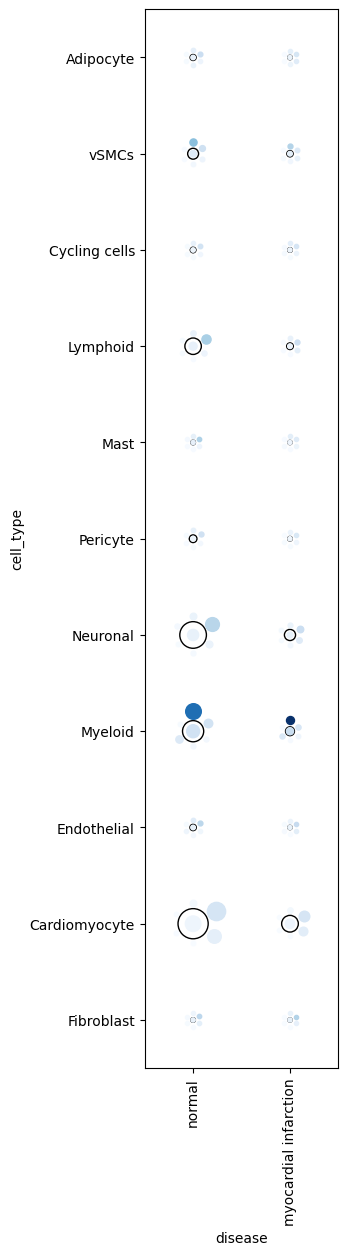

In [34]:
line_width = 1
# Convert categories to numerical values for plotting
plot_vars['x_steps'] = plot_vars[y_annotation].astype('category').cat.codes
plot_vars['y_steps'] = plot_vars[x_annot].astype('category').cat.codes
w, h = calculate_figure_size_2(len(plot_vars['x_steps'].unique()), len(plot_vars['y_steps'].unique()), max_size, max_size, dot_scale)

# Plot main dots
fig, ax = plt.subplots(figsize=(w, h))
ax.scatter(plot_vars['x_steps'], plot_vars['y_steps'], s=plot_vars['outer_size']**2, facecolors='none', edgecolors='0',linewidths=line_width)
ax.scatter(plot_vars['x_steps'], plot_vars['y_steps'], s=plot_vars['inner_size']**2, c=plot_vars['mean_expression'], cmap='Blues', vmin=vmin, vmax=vmax)

for i, row in plot_vars.iterrows():
    p=0
    outer_size = row['outer_size']
    for gene in genes:
        size = row[gene+'_dot_size']
        size_factor = (2*line_width+(outer_size+size)/2)*dot_scale
        offset_x = size_factor*planet_x[p]
        offset_y = size_factor*planet_y[p]
        secondary_x = row['x_steps'] + offset_x
        secondary_y = row['y_steps'] + offset_y 
        ax.scatter(secondary_x, secondary_y, s=row[gene+'_dot_size']**2, c=row[gene+'_y'],cmap='Blues', vmin=vmin, vmax=vmax)
        p=p+1
    

# Adjusting ticks to show actual categories
ax.set_yticks(range(len(df[x_annot].unique())))
ax.set_yticklabels(df[x_annot].unique())
ax.set_xticks(range(len(df[y_annotation].unique())))
ax.set_xticklabels(df[y_annotation].unique(), rotation='vertical')

buffer = 5  # Adjust buffer size as needed
plt.xlim(-0.5,1.5)
plt.ylim(-0.5,10.5)

ax.set_ylabel('cell_type')
ax.set_xlabel('disease')

In [ ]:
#legend colour:

In [ ]:
#legend size:

In [ ]:
#legend planets: